In [161]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import math

# Duomenų nuskaitymas

In [162]:
data_file = "sunspot.txt"
columns = ['year', 'sun_activity']
n = 10
data = pd.read_csv(data_file, sep="\t", header=None, names=columns)
print(data)

     year  sun_activity
0    1700             5
1    1701            11
2    1702            16
3    1703            23
4    1704            36
..    ...           ...
310  2010            16
311  2011            57
312  2012            58
313  2013            65
314  2014            79

[315 rows x 2 columns]


# P ir T matricos

In [163]:
P = []
T = []
for i in range(0, len(data) - n):
    temp = []
    for j in range(n):
        temp.append(data["sun_activity"][i + j])
    P.append(temp)
    T.append([data["year"][i + n], data["sun_activity"][i + n]])

T = pd.DataFrame(T, columns=['year', 'sun_activity'])

# P ir T duomenų rinkinių išskyrimas

In [164]:
Pu = P[:200]
Tu = T.head(200)

# Tiesinio neurono sukūrimas

In [165]:
class AdaptiveLinearNeuron(object):
   def __init__(self, rate = 0.01, niter = 10):
      self.rate = rate
      self.niter = niter

   def fit(self, X, y):
      # weights
      self.weight = np.zeros(1 + X.shape[1])

      # Number of misclassifications
      self.errors = []

      # Cost function
      self.cost = []

      for i in range(self.niter):
         output = self.net_input(X)
         errors = y - output
         self.weight[1:] += self.rate * X.T.dot(errors)
         self.weight[0] += self.rate * errors.sum()
         cost = (errors**2).sum() / 2.0
         self.cost.append(cost)
      return self

   def net_input(self, X):
      """Calculate net input"""
      return np.dot(X, self.weight[1:]) + self.weight[0]

   def activation(self, X):
      """Compute linear activation"""
      return self.net_input(X)

   def predict(self, X):
      """Return class label after unit step"""
      return self.activation(X)

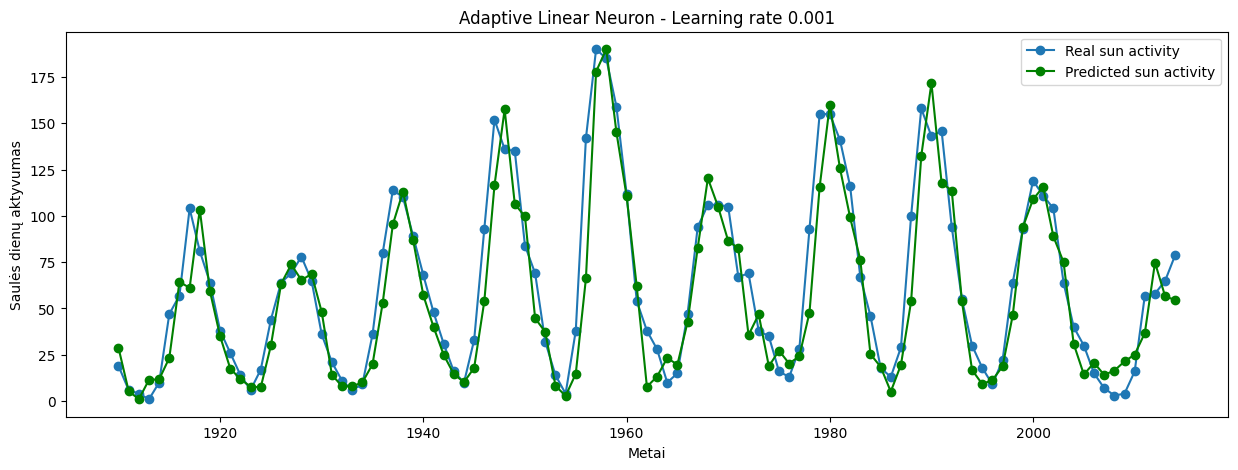

[  8.63485918   2.93424488   9.94844649   4.84449361  -1.36184894
  -2.08628431  -2.39334401   8.67244037 -20.2003937  -31.48221703
 112.12650773]


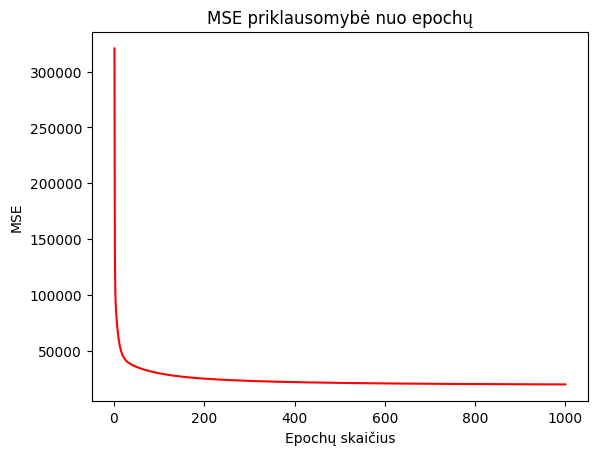

In [166]:
for i in range(len(P)):
    for j in range(len(P[0])):
        P[i][j] /= 100

aln1 = AdaptiveLinearNeuron(0.001, 1000).fit(np.array(Pu),np.array(Tu["sun_activity"]))

test = aln1.predict(np.array(P[200:]))
test = pd.DataFrame(test)
min_test_activity = test.min()
max_test_activity = test.max()
min_activity = data.loc[data["year"] >= 1900 + n, "sun_activity"].min()
max_activity = data.loc[data["year"] >= 1900 + n, "sun_activity"].max()
test_mapped = min_activity + (max_activity - min_activity) * (test - min_test_activity) / (max_test_activity - min_test_activity)

fig = plt.figure(figsize=(15, 5))
plt.plot(T[200:]["year"], T[200:]["sun_activity"], marker='o')
plt.plot(T[200:]["year"], test_mapped, marker='o', color='g')
plt.xlabel('Metai')
plt.ylabel('Saulės dienų aktyvumas')
plt.title('Adaptive Linear Neuron - Learning rate 0.001')
plt.legend(['Real sun activity', 'Predicted sun activity'])
plt.show()

# 17
print(f"{aln1.weight}")

plt.plot(range(1, 1000+1), aln1.cost, color='red')
plt.xlabel("Epochų skaičius")
plt.ylabel("MSE")
plt.title(f"MSE priklausomybė nuo epochų")
plt.show()

# MSE reikšmė

In [167]:
error_sum = 0
for i in (T[200:]["sun_activity"] - np.array(test).flatten().tolist()):
    error_sum += i * i
mse = 1 / len(T) * error_sum
print("MSE: {}".format(mse))

MSE: 102.00500314081107
